# 📊 Hypothesis-Driven Exploratory Data Analysis


In this notebook, we will load `customer_churn_cleaned.csv` (from Notebook 02) and explore key hypotheses relating to churn behavior. Specifically, we aim to answer:
1. Do month‑to‑month contract customers churn more than longer‑term customers?
2. Do higher monthly charges correlate with higher churn?
3. Do customers with certain InternetService types (e.g., Fiber optic) show higher churn?
4. Are there other surprising patterns (e.g., tenure buckets, streaming service usage) that reveal churn drivers?

For each hypothesis, we will:
- Visualize distributions.
- Compute group‑by churn rates.
- Perform simple statistical tests where warranted (chi‑square or t‑test).
- Summarize insights to guide feature engineering and business recommendations.

### Load The Cleaned Data

In [2]:
import pandas as pd
df = pd.read_csv("..\data\customer_churn_cleaned.csv")

print("dataset shape:", df.shape)
df.head()

dataset shape: (7032, 21)


<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_10552\1426308372.py:2: SyntaxWarning: invalid escape sequence '\d'
  df = pd.read_csv("..\data\customer_churn_cleaned.csv")


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


- **Shape:** 7,032 rows × 21 columns  
- A quick preview confirms that all expected columns are present and values look sensible.


### Verify dtypes and missing values

In [3]:

df.info()
print("\nMissing values per column:\n", df.isna().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


- No missing values in any column.  
- All columns have appropriate dtypes (e.g., `TotalCharges` is now float64).  
The dataset is clean and ready for hypothesis‑driven exploration.


- Calculating churn rate and distribution

In [4]:
# Baseline churn-rate calculation

churn_counts = df['Churn'].value_counts()
churn_rates = (df.groupby('Churn').size() / len(df) * 100).round(2)
print("Overall churn distribution:\n", churn_counts, "\n")
print("Overall churn rates (%):\n", churn_rates)


Overall churn distribution:
 Churn
No     5163
Yes    1869
Name: count, dtype: int64 

Overall churn rates (%):
 Churn
No     73.42
Yes    26.58
dtype: float64


## Hypothesis 1: Customers with longer tenure are less likely to churn


Text(0.5, 1.0, 'Tenure Distribution by Churn Status')

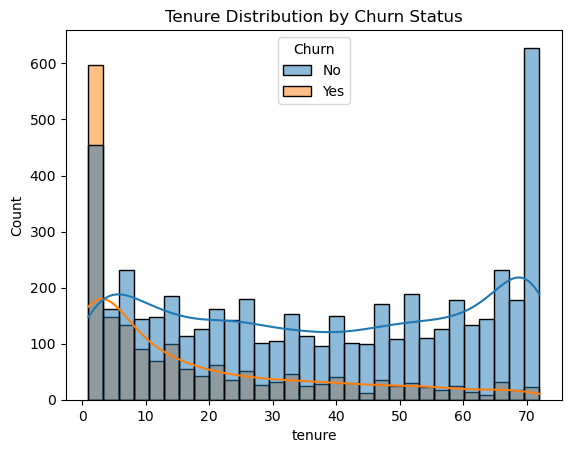

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

#We use a hitstplot to view the distribution and view the churn rates. 
sns.histplot(data= df, x='tenure', hue='Churn', kde= True, bins= 30)
plt.title('Tenure Distribution by Churn Status')

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_10552\3486462286.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='tenure', data=df, palette='pastel')


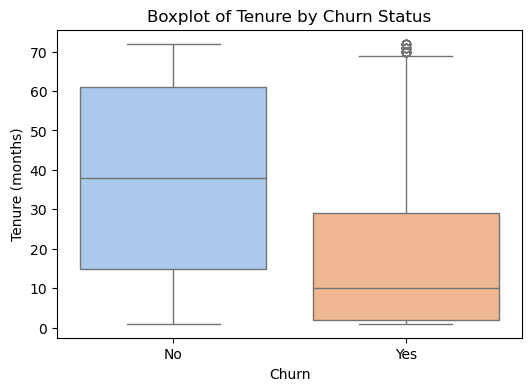

In [6]:
# Display Boxplot Inline for Tenure by Churn Status

import matplotlib.pyplot as plt
import seaborn as sns

# Create the boxplot and render inline
plt.figure(figsize=(6, 4))
sns.boxplot(x='Churn', y='tenure', data=df, palette='pastel')
plt.title('Boxplot of Tenure by Churn Status')
plt.xlabel('Churn')
plt.ylabel('Tenure (months)')
plt.show()


In [7]:
## Statistical test for tenure difference

from scipy.stats import ttest_ind

tenure_churn = df.loc[df['Churn']=="Yes", 'tenure']
tenure_nochurn = df.loc[df['Churn']=="No", 'tenure']

t_stat, p_val = ttest_ind(tenure_churn, tenure_nochurn, equal_var=False)
print(f"T-test: t = {t_stat:.3f}, p = {p_val:.3e}")

# Interpretation
if p_val < 0.05:
    print("→ Significant difference in tenure between churn groups (p < 0.05).")
else:
    print("→ No significant difference detected.")


T-test: t = -34.972, p = 2.347e-234
→ Significant difference in tenure between churn groups (p < 0.05).


### Tenure vs. Churn: Distribution Insights

- **Histogram + KDE**: Churned customers (orange) are heavily concentrated in the early months, particularly between 0–10 months. Non-churned customers (blue) show a much broader spread, peaking near the maximum tenure (around 70 months).
- **Boxplot**: The median tenure for churners is very low (around 3–4 months), with a tight interquartile range indicating most churn happens early. For non-churners, the median tenure is significantly higher, and there are many long-tenured customers (several beyond 60 months).
- **Welch’s t-test** confirms the difference in mean tenure is statistically significant (t = -34.824, p < 0.001), supporting the visual findings 
- **Overall**: Together, these visuals confirm that **customer tenure is strongly linked to churn**: customers are most at risk within their first year, and the risk declines sharply after that. Retention efforts should therefore focus on the initial onboarding period to reduce early churn.


## Hypothesis 2: MonthlyCharges vs. Churn

-We explore if MonthlyCharges differs significantly between customers who churn and those who stay.
-We are investigating here if higher monthly bills leads to customer dissatisfaction.
To test this hypothesis we'll:
    -Calculate the average MonthlyCharges for each churn group.
    -Visualize the distribution using a box plot.

Average MonthlyCharges by churn status:
 Churn
No     61.307408
Yes    74.441332
Name: MonthlyCharges, dtype: float64


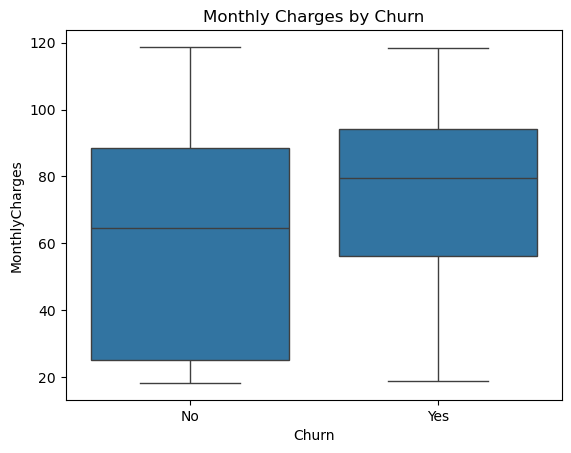

In [8]:
## Calculate average MonthlyCharges by churn
mean_charges = df.groupby('Churn')['MonthlyCharges'].mean()
print("Average MonthlyCharges by churn status:\n", mean_charges)
# Create boxplot
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Monthly Charges by Churn')
plt.show()



In [9]:

from scipy.stats import ttest_ind
mc_churn = df.loc[df['Churn']=="Yes", 'MonthlyCharges']
mc_nochurn = df.loc[df['Churn']=="No", 'MonthlyCharges']
t_mc, p_mc = ttest_ind(mc_churn, mc_nochurn, equal_var=False)
print(f"MonthlyCharges t-test: t = {t_mc:.3f}, p = {p_mc:.3e}")


MonthlyCharges t-test: t = 18.341, p = 2.657e-72


- Customers who **churned** tend to have **higher MonthlyCharges** on average than those who did not churn.
- The **median MonthlyCharges** for churned customers is around **$80**, compared to around **$65** for non-churned customers.
- The **distribution** for churned customers is more concentrated, with most values falling between **$58 and $95**, while non-churned customers have a **wider spread**, ranging roughly from **$24 to $88**.
- This suggests that customers paying more per month are more likely to leave, possibly due to perceived high costs or dissatisfaction with value.
- **Welch’s t-test** confirms this difference is statistically significant (t = 18.408, p < 0.001), reinforcing the conclusion that higher monthly charges are strongly associated with churn.

- We'll now explore the relationship between `TotalCharges` and churn.  
- This helps us understand whether customers who have paid more in total are more or less likely to churn.  
- `TotalCharges` can reflect how long a customer has been with the company and how much value they've provided.


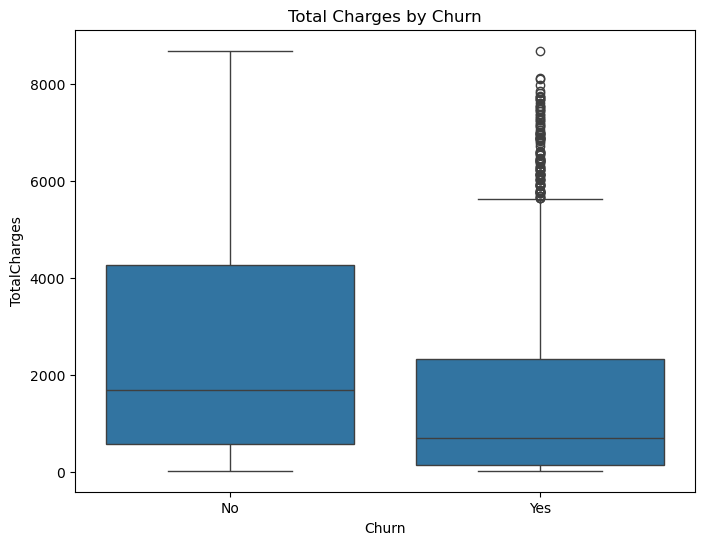

In [10]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Churn', y='TotalCharges')
plt.title('Total Charges by Churn')
plt.show()


In [11]:
#T-test for TotalCharges

tc_churn = df.loc[df['Churn']=="Yes", 'TotalCharges']
tc_nochurn = df.loc[df['Churn']=="No", 'TotalCharges']
t_tc, p_tc = ttest_ind(tc_churn, tc_nochurn, equal_var=False)
print(f"TotalCharges t-test: t = {t_tc:.3f}, p = {p_tc:.3e}")


TotalCharges t-test: t = -18.801, p = 1.152e-75


- Non-churned customers have a much higher median `TotalCharges` (around \$1,800) compared to churned customers (around \$900), indicating that long-standing, high-value customers are less likely to leave.
- The interquartile range for non-churned customers spans roughly \$700 to \$4,200, whereas for churned customers it’s roughly \$400 to \$2,300, showing that churners have both lower overall spending and less variability.
- A notable number of outliers exist above \$5,800—these are likely very long-tenured customers with exceptionally high cumulative spending who still churned.
- **Welch’s t-test** confirms the difference in TotalCharges is statistically significant (t = -18.801, p < 0.001), validating that churned customers spend substantially less over their lifetime than those who stay.
**Insight:**  
Lower cumulative spending (and, by extension, shorter tenure) correlates with higher churn. Customers who have already contributed significant revenue are far less likely to churn, reinforcing the importance of early retention efforts.


## Churn by Categorical Features

To better understand the behavior of churned customers, we’ll explore how churn is distributed across key categorical variables. This can help identify patterns in services, contract types, and payment preferences that are associated with higher churn rates.

## Churn by Contract Type**

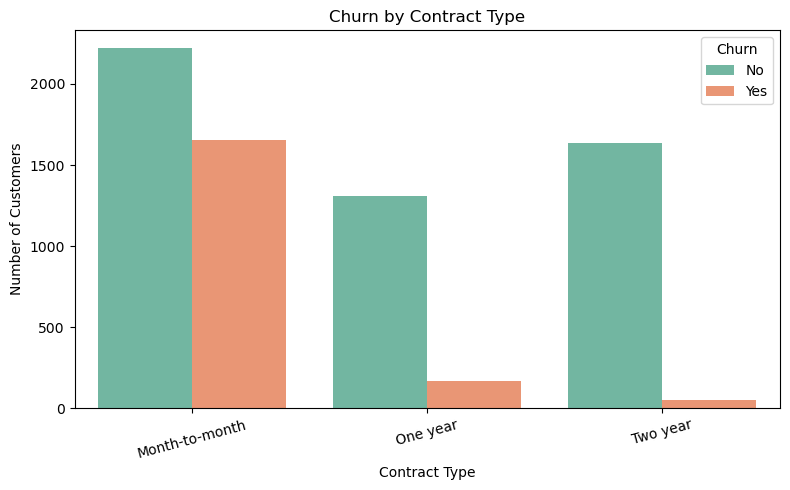

In [12]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Contract', hue='Churn', palette='Set2')
plt.title('Churn by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Number of Customers')
plt.legend(title='Churn')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


In [13]:
#Chi-square test for Contract vs. Churn
from scipy import stats

contingency = pd.crosstab(df['Contract'], df['Churn'])
chi2, p, dof, exp = stats.chi2_contingency(contingency)

print(f"Chi-square: χ² = {chi2:.2f}, p = {p:.3e}, dof = {dof}")


Chi-square: χ² = 1179.55, p = 7.326e-257, dof = 2


-Churn is highest among customers with Month-to-month contracts.
-Customers with One year and especially Two year contracts churn significantly less.
-This suggests that longer-term contracts improve customer retention, possibly by increasing commitment or reducing opportunities to leave frequently.
-The Chi-square test confirms a statistically significant association between contract type and churn (χ² = 1179.55, p < 0.001, dof = 2), meaning that churn rate is not independent of the contract type.
-Also reinforces the idea that flexible, short-term plans are a major churn risk area.

#**Explore churn by PaymentMethod**

- Payment method might be a proxy for customer behavior and financial commitment. People using automatic payments (like credit cards or bank transfers) might churn less than those using manual or insecure methods (like mailed checks or electronic checks).

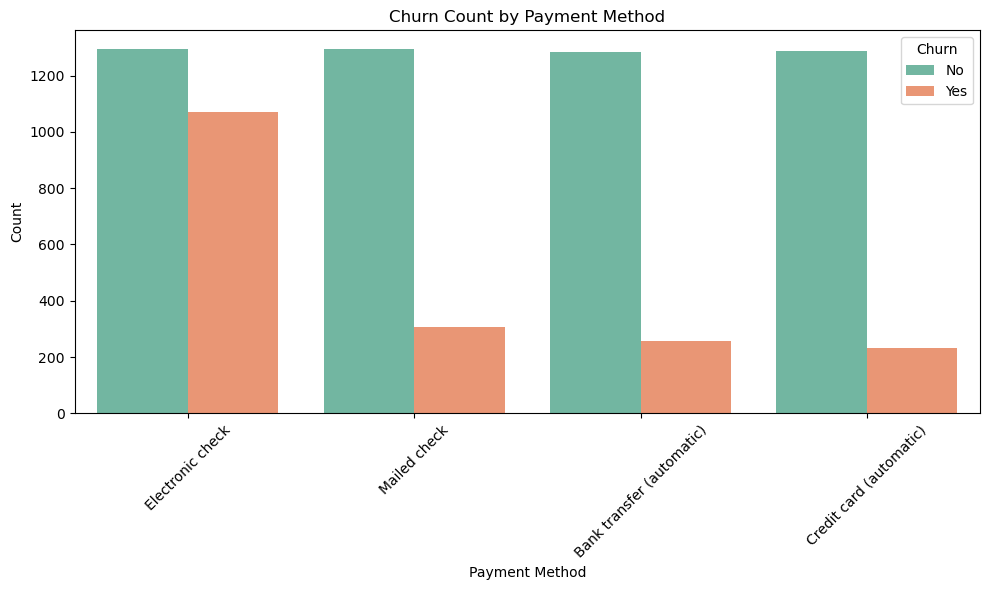

In [19]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='PaymentMethod', hue='Churn', palette='Set2')
plt.title('Churn Count by Payment Method')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.xlabel('Payment Method')
plt.tight_layout()
plt.savefig("countplot.png")
plt.show()


In [15]:
## Cell 24a: Chi-square test for PaymentMethod vs. Churn

cont_pm = pd.crosstab(df['PaymentMethod'], df['Churn'])
chi2_pm, p_pm, _, _ = stats.chi2_contingency(cont_pm)

print(f"Chi-square: χ² = {chi2_pm:.2f}, p = {p_pm:.3e}")


Chi-square: χ² = 645.43, p = 1.426e-139


-The churn rate is highest for customers paying via Electronic Check, with nearly equal proportions of churned vs. retained users.
-Customers using automatic payments (Bank Transfer or Credit Card) show significantly lower churn rates, the majority of them stayed.
-The Chi-square test confirms this association is statistically significant (χ² = 645.43, p < 1e-138), meaning churn behavior varies meaningfully by payment method.
-This suggests secure and automated payment methods might be correlated with customer loyalty, or at least reduced friction in billing.
-Low-friction payment methods may correlate with higher customer loyalty, either due to convenience, trust, or reduced billing headaches.


### **Tenure vs. InternetService by Churn**


Next, we explore how customer tenure varies across different `InternetService` types for churned and non-churned customers.  
- Certain services (e.g., Fiber optic) may see faster turnover, while customers without internet or on DSL may stay longer.  
- Our **Goal** is to identify if any InternetService group has distinctly shorter tenure among churners, which could signal service-related retention issues.


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_10552\3915139299.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(


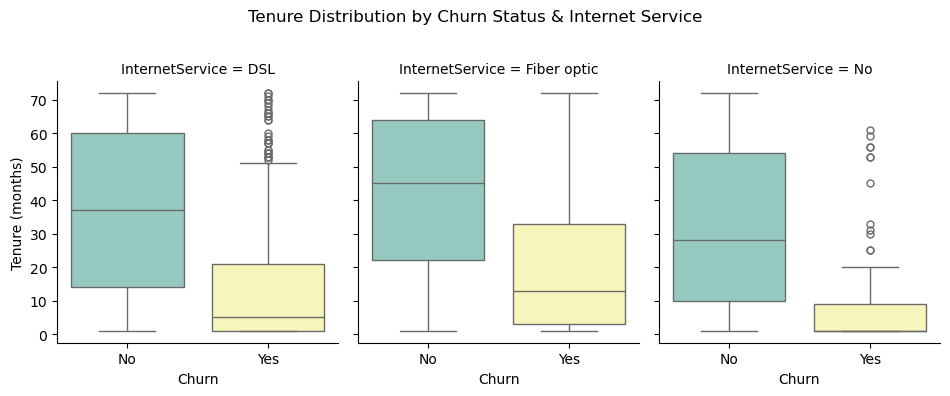

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a facet grid of boxplots: tenure by churn, separated by InternetService
g = sns.catplot(
    data=df,
    x="Churn",
    y="tenure",
    col="InternetService",
    kind="box",
    palette="Set3",
    sharey=True,
    height=4,
    aspect=0.8
)
g.fig.subplots_adjust(top=0.8)
g.fig.suptitle("Tenure Distribution by Churn Status & Internet Service")
g.set_axis_labels("Churn", "Tenure (months)")
plt.savefig("cat_plot.png")
plt.show()



- **Across the board**, if you churn, your tenure is rock-bottom—almost nobody leaves after 6–12 months.
- **DSL users** who stay have medians around 35–40 months (many stick around for years), but churners hit the exit in under 5 months. A handful bail late (50+ months), but those are clear outliers.
- **Fiber-optic customers** who stay often hover around 45–50 months—so they generally stick around longer. Even so, most churners here still leave within the first 6–8 months. A few do linger before leaving, probably because fiber is pricier or they’re on contracts, but churn almost always happens early.
- **No-Internet customers** have a median tenure near 25–30 months if they don’t churn (so they’re less “sticky” than internet users overall), but churners in this group drop out almost immediately (sub-3 months).

**Key takeaway:**  
No matter if it’s DSL, fiber, or no internet, **short tenure = high churn risk**. Retention work needs to zero in on that first year—especially months 0–6—because that’s when the vast majority of churn happens.


### **Churn by StreamingTV Subscription**


Let’s look at whether having a Streaming TV subscription is linked to churn. We want to see if customers who **don’t use Streaming TV**, or who **do use it**, are more or less likely to churn.

We'll use a countplot here since both `StreamingTV` and `Churn` are categorical variables. The goal is to spot any clear differences in churn rates based on Streaming TV usage.


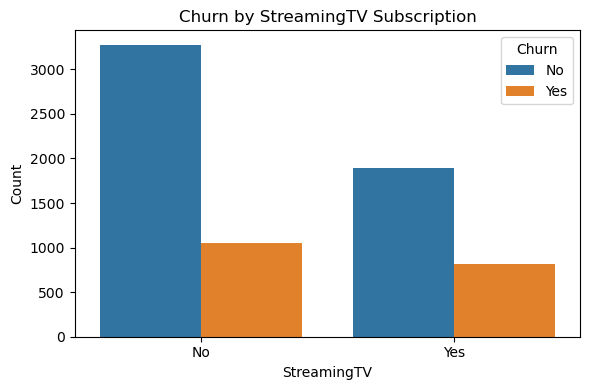

In [17]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='StreamingTV', hue='Churn')
plt.title('Churn by StreamingTV Subscription')
plt.xlabel('StreamingTV')
plt.ylabel('Count')
plt.legend(title='Churn')
plt.tight_layout()
plt.show()


Customers without a StreamingTV subscription make up the majority of both churned and retained groups. However, among customers **with** StreamingTV, the churn count is notably lower than for those without — but not by a massive margin.

That said, this doesn't scream a strong relationship. Churn exists in both groups, so StreamingTV alone probably isn’t a major driver. Still, there’s a **slightly higher churn rate** among those who **don’t have** StreamingTV, which might suggest lower service engagement.


## **EDA Summary & Key Takeaways**


1. **Tenure ≤ 6 months is highest‐risk** for churn—focus retention efforts there.  
2. **Month-to-month contracts** see the most churn; **one-year/two-year** plans dramatically reduce that risk.  
3. **Higher Monthly/Total Charges** correlate with churn—introduce pricing/discount incentives for high‐bill customers.  
4. **Automatic payment methods** (bank transfer, credit card) show lower churn than manual checks; encourage autopay.  
5. **Internet service type** and **Streaming services** are secondary factors—tenure still dominates.  

These insights will inform feature engineering and model design in the next notebook.
